In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

In [16]:

data = pd.read_csv("C:\\Users\\Trupti\\Downloads\\winequality-white.xlsx",sep=';')
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 10: invalid start byte

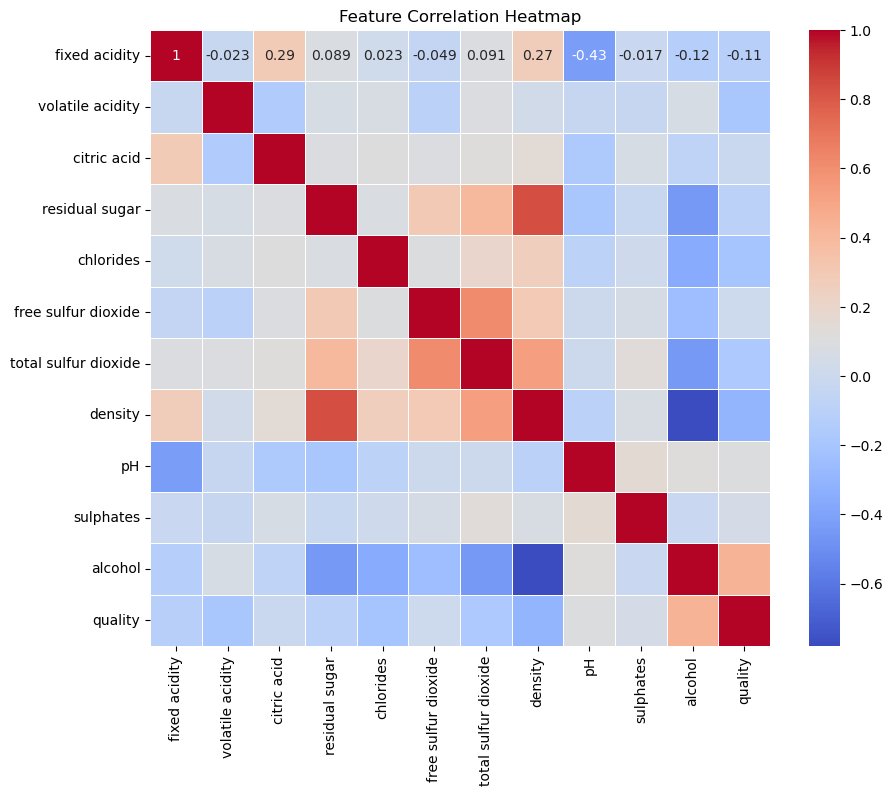

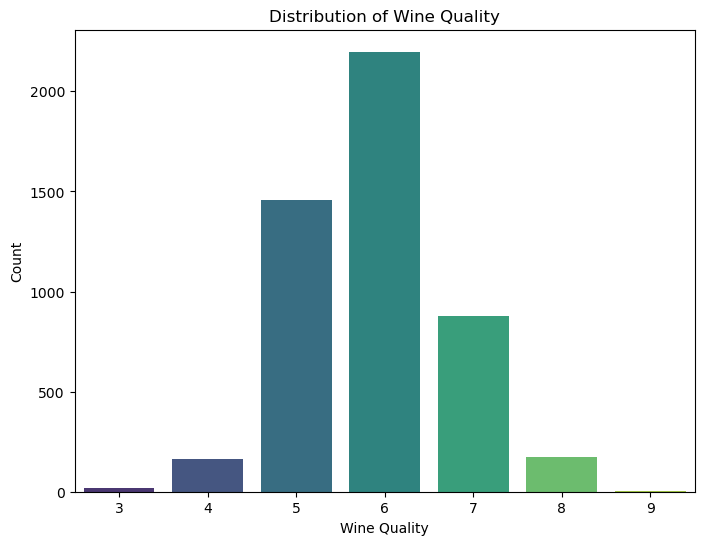

In [11]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Distribution of Wine Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data_cleaned, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()


In [12]:
X = data_cleaned.drop(columns='quality')
y = data_cleaned['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\Trupti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.49489795918367346
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.54      0.45      0.49       291
           6       0.48      0.76      0.59       432
           7       0.45      0.14      0.21       192
           8       0.00      0.00      0.00        35

    accuracy                           0.49       980
   macro avg       0.25      0.22      0.22       980
weighted avg       0.46      0.49      0.45       980



C:\Users\Trupti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trupti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trupti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


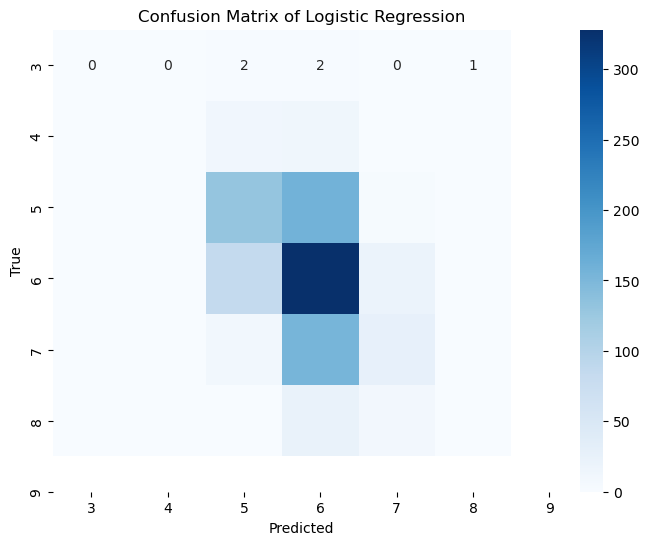

C:\Users\Trupti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


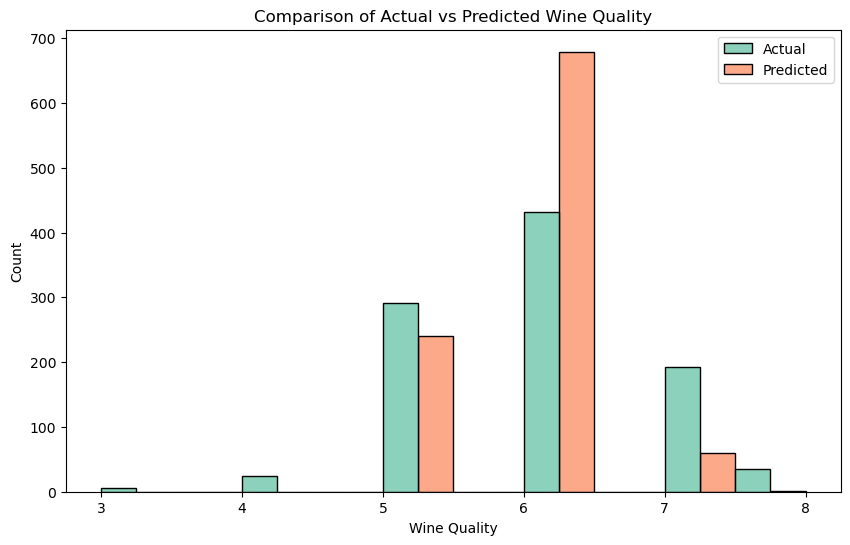

In [14]:

# 1. Confusion Matrix for Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. Comparison of Actual vs Predicted Quality
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.histplot(comparison_df, kde=False, palette="Set2", multiple="dodge", bins=10)
plt.title('Comparison of Actual vs Predicted Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()